# Logistic Regression

In [27]:
# Import the necessary libs
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [29]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
seaborn.set_style('whitegrid')

#### Create the DataFrame using titanic-training-data.csv

In [30]:
address = 'D:/Users/okanb/Desktop/jupyter/course_PythonforDataScienceEssentialTrainingPart2/titanic-training-data.csv'
df = pd.read_csv(address)
df.columns = ['PassangerId','Survived','Pclass', 'Name','Sex','Age','SibSp','Parch','Ticket', 'Fare', 'Cabin','Embarked']
print(df.head())

   PassangerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassangerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


##### VARIABLE DESCRIPTIONS

Survived - Survival (0 = No; 1 = Yes)<br>
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
Name - Name<br>
Sex - Sex<br>
Age - Age<br>
SibSp - Number of Siblings/Spouses Aboard<br>
Parch - Number of Parents/Children Aboard<br>
Ticket - Ticket Number<br>
Fare - Passenger Fare (British pound)<br>
Cabin - Cabin<br>
Embarked - Port of Embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton - Cobh, Ireland)

##### We want to predict survival.
##### First, check the survival variables are binary variables ?

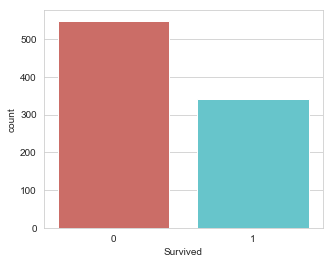

In [32]:
seaborn.countplot(x = 'Survived', data=df, palette='hls')

#### Check for missing values

In [33]:
df.isnull().sum()

PassangerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
df.describe()

,PassangerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Taking care of missing values
##### Dropping missing values
So let's just go ahead and drop all the variables that aren't relevant for predicting survival. We should at least keep the following:
- Survived - This variable is obviously relevant.
- Pclass - Does a passenger's class on the boat affect their survivability?
- Sex - Could a passenger's gender impact their survival rate?
- Age - Does a person's age impact their survival rate?
- SibSp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probability
- Parch - Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probability
- Fare - Does the fare a person paid effect his survivability? Maybe - let's keep it.
- Embarked - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it.

What about a person's name, ticket number, and passenger ID number? They're irrelavant for predicting survivability. And as you recall, the cabin variable is almost all missing values, so we can just drop all of these.

In [35]:
titanic_data = df.drop(['Name','Ticket','Cabin'], axis = 1)
titanic_data.head()

,PassangerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### Imputing missing values

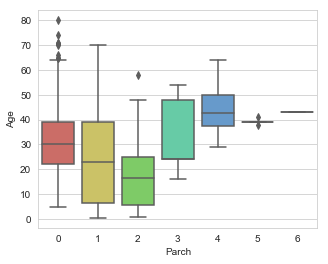

In [36]:
# First check the boxplot plot
sb.boxplot(x = 'Parch', y = 'Age', data = titanic_data, palette='hls')

In [37]:
# Let's see the average age of the per Parch category
Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean()

,PassangerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [43]:
# Now, define a function that replace NaN Age values according to the Parch - Age mean value
def age_approx(colm):
    Age = colm[0]
    Parch = colm[1]
    
    if pd.isnull(Age):
        if Parch == 0:
            return 32
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30 # mean of all Age values
    else:
        return Age        

In [44]:
# Now call the function age_approx() and check the missing values again
titanic_data['Age'] = titanic_data[['Age', 'Parch']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

PassangerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [45]:
# We have 2 missing values in Embarked column, so just drop them
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace=True, drop=True)
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
PassangerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB
None


### The next step is converting the categorical variables to dummy indicators

In [46]:
# Let's convert the Sex variables into numeric variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_encoded = label_encoder.fit_transform(titanic_data['Sex'])
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [47]:
# What the 0 and 1 corresponds for ? Let's see
titanic_data.head()

,PassangerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


The first row -> Male ,  so 1 = Male, 0 = Female

In [49]:
gender_df = pd.DataFrame(gender_encoded, columns=['male_gender'])
gender_df.head()

# if gender is male, then 1, otherwise 0

,male_gender
0,1
1,0
2,0
3,0
4,1


In [50]:
# Now, let's convert the Embarked variables into numeric variables
embarked_encoded = label_encoder.fit_transform(titanic_data['Embarked'])
embarked_encoded[0:5]

array([2, 0, 2, 2, 2])

In [67]:
# S -> 2, C -> 0 and Q -> 1
# But we should convert these into the binary values (0, 1), so let's use the one-hot enconding technique!

from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories='auto')
embarked_binary_encoded = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1)) # reshape as a one column
# transform into a matrix
embarked_binary_encoded_mat = embarked_binary_encoded.toarray()
# Create a new DataFrame
embarked_df = pd.DataFrame(embarked_binary_encoded_mat, columns = ['C','Q','S'])
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [70]:
# Now, drop the Sex and Embarked columns from the original dataset
titanic_data.drop(['Sex', 'Embarked'], axis = 1, inplace =True)
titanic_data.head()

,PassangerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [73]:
# Concate the columns
titanic_dummy = pd.concat([titanic_data, gender_df, embarked_df], axis = 1, verify_integrity=True).astype(float)
titanic_dummy[0:5]

,PassangerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


### Check for independence between features

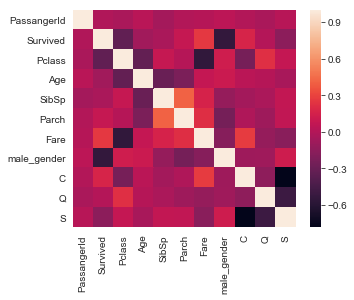

In [74]:
# use the seaborn heatmap function
sb.heatmap(titanic_dummy.corr())

-If you have a correlation that's close to 1 or negative 1, that means you are having some sort of strong relation between
a variable pair

-Logistic Regression assumes that features are independent of one another, so we can not have that

As you can see , Pclass and Fare, they are definetely not independent of one another, so let's just drop those

In [76]:
titanic_dummy.drop(['Pclass', 'Fare'], axis = 1, inplace=True)
titanic_dummy.head()

,PassangerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


### Check that the dataset size is sufficient

Rule of thumb -> We should have alt least 50 records per predictive feature
We have 6 predictive features here : PassangerId, Age, SibSp, Parch, male_gender, (C,Q,S as one column)
So 6*50=300 records are needed

In [77]:
titanic_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
PassangerId    889 non-null float64
Survived       889 non-null float64
Age            889 non-null float64
SibSp          889 non-null float64
Parch          889 non-null float64
male_gender    889 non-null float64
C              889 non-null float64
Q              889 non-null float64
S              889 non-null float64
dtypes: float64(9)
memory usage: 62.6 KB


We have 889 records, so we have enough data to do logistic regression!

In [81]:
# lets split the data as training and test set -> %20 for test set
X_train, X_test, y_train, y_test = train_test_split(titanic_dummy.drop('Survived', axis = 1), titanic_dummy['Survived'], 
                                                    test_size = 0.2, random_state=200)

In [83]:
print(X_train.shape) 
print(y_train.shape) # 1 row with 711 records

(711, 8)
(711,)


In [ ]:
X_train[0:5]

### Deploying and evaluating the model

In [85]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

-For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

In [86]:
y_pred = LogReg.predict(X_test)

## Model Evaluation

### Classification Report without cross-validation

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

   micro avg       0.81      0.81      0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



### K-fold cross-validation and confusion matrix

In [88]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[377,  63],
       [ 91, 180]], dtype=int64)

It tells us 377 & 180 are the number of correct prediction
91 & 63 are the number of incorrect prediction

In [90]:
precision_score(y_train,y_train_pred)

0.7407407407407407

## Make a Test Prediction

In [92]:
titanic_dummy[861:862]

,PassangerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
861,864.0,0.0,17.0,8.0,2.0,0.0,0.0,0.0,1.0


In [96]:
test_passenger = np.array([864, 20, 8, 2, 0, 0, 0, 1]).reshape(1,-1)
print(LogReg.predict(test_passenger))
print(LogReg.predict_proba(test_passenger)) # predict the probability of it being correct

[0.]
[[0.76989435 0.23010565]]


The probability of this prediction being correct % 76 ? 